In [1]:
import sys
sys.path.append('../')
from cardiac_evalfunctions import *
import active_dynamicmemory.runutils as rutils

In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mperkonigg/.local/lib/python3.6/site-packages/m

To see the dynamics during training validation curves can be plotted by calling `plot_validation_curves(<path_to_config_files>, [optional <list of method names>], [optional <list of random seeds>])`.
Note: Plotting those curves is only useful for methods trained on a continuous datastream

FileNotFoundError: [Errno 2] No such file or directory: '/project/catinous/active_catinous/MELBA/log/tensorboard_logs/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_56adadeaa5'

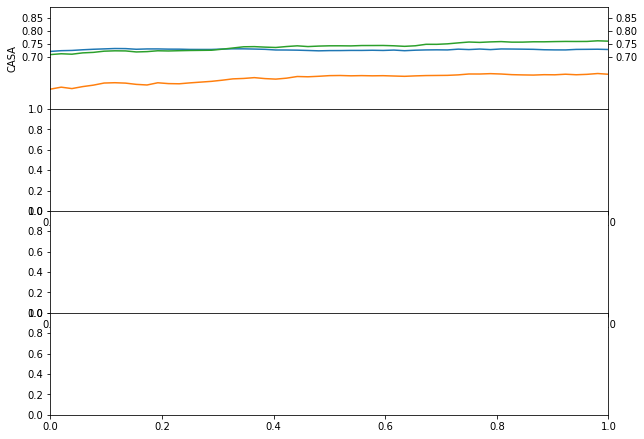

In [14]:
plot_validation_curves(['../training_configs/cardiac_casa.yml', '../training_configs/cardiac_uncertainty.yml', '../training_configs/cardiac_naive.yml'], names=['CASA', 'Unc', 'Naive'], seeds=[1, 2, 3, 4, 5])

To evaluate a specific config call `eval_config(<path_to_config_file>)`.

Results are cached to avoid recalculation.

In [2]:
eval_config('../training_configs/cardiac_base.yml')

init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_batch_cardiacslicessplitsingle_base_1_d885e299cf.pt


,scanner,dice_lv,dice_myo,dice_rv,dice_mean
0,Canon,0.398034,0.361050,0.161379,0.302008
1,GE,0.772942,0.665817,0.735189,0.701991
2,Philips,0.819396,0.745160,0.786602,0.774186
3,Siemens,0.854722,0.773785,0.802222,0.799329


In [ ]:
eval_config('../training_configs/cardiac_naive.yml', seeds=[1, 2, 3, 4, 5])

In [ ]:
eval_config('../training_configs/cardiac_naive_20.yml', seeds=[1, 2, 3, 4, 5])

In [14]:
df = eval_config('../training_configs/cardiac_joint.yml', seeds=[1, 2, 3, 4, 5])
df.groupby('scanner').agg({'dice_lv': ['mean', 'std'], 'dice_myo': ['mean', 'std'], 'dice_rv': ['mean', 'std'], 'dice_mean': ['mean', 'std']}, )

dice_lv            dice_myo             dice_rv           dice_mean  \
             mean       std      mean       std      mean       std      mean   
scanner                                                                         
Canon    0.892480  0.013229  0.778514  0.016993  0.781722  0.009377  0.796754   
GE       0.856229  0.021028  0.766006  0.020088  0.789276  0.012075  0.793967   
Philips  0.897115  0.009725  0.839505  0.013415  0.843776  0.004985  0.855314   
Siemens  0.870262  0.025217  0.763125  0.031622  0.797200  0.006804  0.798511   

                   
              std  
scanner            
Canon    0.009746  
GE       0.019573  
Philips  0.008548  
Siemens  0.022761

To evaluate multiple configs at once and get an overview call `eval_config_list(<path_to_config_files>, <list of method names>, [optional <list of random seeds>])`

In [4]:
df_overview = eval_config_list(['../training_configs/cardiac_naive.yml', '../training_configs/cardiac_dynamicmemory.yml'], ['Naive', 'DM'])
df_overview[['Siemens', 'GE', 'Philips', 'Canon', 'BWT', 'FWT']]

scanner,Siemens,GE,Philips,Canon,BWT,FWT
model,,,,,,
DM,0.793,0.756,0.811,0.842,0.010,0.046
Naive,0.783,0.741,0.789,0.843,-0.012,0.053


If a specific dice score is of intrest the parameter `value` can be added to get the evaluation for either left ventricle (dice_lv), left ventricular myocardium (dice_myo) or the right ventricle (dice_rv).

In [5]:
df_overview = eval_config_list(['../training_configs/cardiac_naive.yml', '../training_configs/cardiac_dynamicmemory.yml'], ['Naive', 'DM'], value='dice_lv')
df_overview[['Siemens', 'GE', 'Philips', 'Canon', 'BWT', 'FWT']]

scanner,Siemens,GE,Philips,Canon,BWT,FWT
model,,,,,,
DM,0.840,0.805,0.856,0.913,0.013,0.034
Naive,0.842,0.799,0.853,0.911,0.002,0.032


In [7]:
scanners = ['dd', 'dd', 'aa']
len(np.unique(scanners))

2

In [4]:
df = pd.read_csv('/project/catinous/cardiacslicessplitsingle.csv')

In [6]:
df.groupby('split').count()

,scanner,filepath,t,slice,slicepath
split,,,,,
base,1120,1120,1120,1120,1120
test,942,942,942,942,942
train,4298,4298,4298,4298,4298
val,960,960,960,960,960


In [9]:
round(4298/20), round(4298/10), round(4298/8), round(4298/5)  

(215, 430, 537, 860)

In [3]:
eval_config('../training_configs/cardiac_uncertainty.yml', seeds=[1, 2, 3, 4, 5], split=['val']).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.011082,0.005579,0.007081,NaN,0.007914,3
Canon,0.681170,0.542635,0.388227,0.524394,0.534107,3
FWT,0.063147,0.041195,0.056485,NaN,0.053609,3
GE,0.798549,0.682758,0.767513,0.727617,0.744109,3
Philips,0.837907,0.755809,0.789965,0.787666,0.792837,3
Siemens,0.853111,0.765526,0.796007,0.793766,0.802102,3


In [4]:
eval_config('../training_configs/cardiac_casa.yml', seeds=[1, 2, 3, 4, 5], split=['val']).groupby('scanner').mean()

init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_9200b90000.pt
init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_a281f6bc27.pt
init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_3_e157caf490.pt
init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_4_c84dccfcc1.pt
init cardiac batch with datasetfile /project/catinous/cardiacslicess

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.002330,0.002523,-0.003413,NaN,0.000480,3
Canon,0.749982,0.646656,0.401195,0.594162,0.597999,3
FWT,0.068815,0.077052,0.057743,NaN,0.067870,3
GE,0.842005,0.750914,0.768206,0.776860,0.784496,3
Philips,0.876633,0.823546,0.823384,0.837049,0.840153,3
Siemens,0.872236,0.774936,0.797334,0.806324,0.812707,3


In [5]:
eval_config('../training_configs/cardiac_naive.yml', seeds=[1, 2, 3, 4, 5], split=['val']).groupby('scanner').mean()

init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_f3fda0334e.pt
init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_f57e0ec4a0.pt
init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_3_fee7a00ff9.pt
init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_4_a00b9fb1ad.pt
init cardiac batch with datasetfile /project/catinous/cardiacslicess

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.005466,0.002357,0.008064,NaN,0.005296,3
Canon,0.742579,0.583921,0.430554,0.573551,0.582651,3
FWT,0.096659,0.071617,0.068684,NaN,0.078986,3
GE,0.802381,0.688296,0.763638,0.731137,0.746363,3
Philips,0.837651,0.756647,0.799059,0.790649,0.796001,3
Siemens,0.851206,0.761058,0.798487,0.792221,0.800743,3


In [20]:
with open('../training_configs/cardiac_uncertainty.yml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)
model, logs, df_memory, exp_name = rutils.trained_model(params['trainparams'], params['settings'], training=False)

cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_ad327a247b
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_ad327a247b.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_ad327a247b.pt
True True


In [21]:
df_memory.groupby('scanner').count()

,filepath,pseudodomain,target
scanner,,,
Canon,3,0,3
Philips,1,0,1
Siemens,124,124,124


In [6]:
logs

,created_at,epoch,train_loss,val_dice_lv_Canon,val_dice_lv_GE,val_dice_lv_Philips,val_dice_lv_Siemens,val_dice_myo_Canon,val_dice_myo_GE,val_dice_myo_Philips,val_dice_myo_Siemens,val_dice_rv_Canon,val_dice_rv_GE,val_dice_rv_Philips,val_dice_rv_Siemens,val_loss_Canon,val_loss_GE,val_loss_Philips,val_loss_Siemens
0,2021-05-21 06:32:53.616287,NaN,NaN,0.377802,0.641794,0.754027,0.792872,0.316614,0.568563,0.690788,0.717016,0.137631,0.507879,0.685263,0.653478,0.540540,0.082946,0.030489,0.029106
1,2021-05-21 06:33:00.085992,NaN,NaN,0.377802,0.641794,0.754027,0.792872,0.316614,0.568563,0.690788,0.717016,0.137631,0.507879,0.685263,0.653478,0.540540,0.082946,0.030489,0.029106
2,2021-05-21 06:33:07.059715,NaN,NaN,0.377802,0.641794,0.754027,0.792872,0.316614,0.568563,0.690788,0.717016,0.137631,0.507879,0.685263,0.653478,0.540540,0.082946,0.030489,0.029106
3,2021-05-21 06:33:12.917687,NaN,NaN,0.377802,0.641794,0.754027,0.792872,0.316614,0.568563,0.690788,0.717016,0.137631,0.507879,0.685263,0.653478,0.540540,0.082946,0.030489,0.029106
4,2021-05-21 06:33:19.187419,NaN,NaN,0.377802,0.641794,0.754027,0.792872,0.316614,0.568563,0.690788,0.717016,0.137631,0.507879,0.685263,0.653478,0.540540,0.082946,0.030489,0.029106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2021-05-21 06:48:18.325043,NaN,NaN,0.550915,0.669366,0.766618,0.789190,0.432949,0.574338,0.690482,0.698411,0.255184,0.514858,0.687747,0.650168,0.266327,0.056130,0.022927,0.030280
108,2021-05-21 06:48:41.003737,0.0,0.100622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,2021-05-21 06:48:44.145523,NaN,NaN,0.569310,0.677661,0.775182,0.791239,0.452889,0.580680,0.694325,0.702633,0.268357,0.521724,0.690516,0.652997,0.246302,0.056063,0.023731,0.031240
110,2021-05-21 06:49:19.684192,NaN,NaN,0.556005,0.660424,0.752771,0.788847,0.445803,0.565423,0.680086,0.695924,0.291641,0.519180,0.688048,0.653490,0.228430,0.055967,0.024672,0.030512
